Este notebook trata del problema de modelar la inferencia de una fuente y el background *simultaneamente*. Asumimos un background plano de nivel $B$ y una señal Gaussiana de amplitud $A$. Si tenemos un detector con pixeles $\{x_k\}$, el dato $k$-esimo está dado por

\begin{equation}
D_k = n_0[A\exp(-0.5(x-x_0)^2/w^2) + B]
\end{equation}

Asumimos que conocemos x_0, w y n_0 y queremos inferir los valores de $A$ y $B$.

In [111]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy.stats import poisson
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
w = 5/2.35 # fwhm=5
x0 = 0
xplot = np.arange(-10,11,1)
def model(x,A,B):
    return (A*np.exp(-0.5*((x-x0)/w)**2) + B)
def log_likelihood(y,x,A,B):
    ll = 0
    n = y.shape[0]
    for i in range(n):
        ll += np.log(poisson.pmf(y[i],model(x[i],A,B)))
    return ll

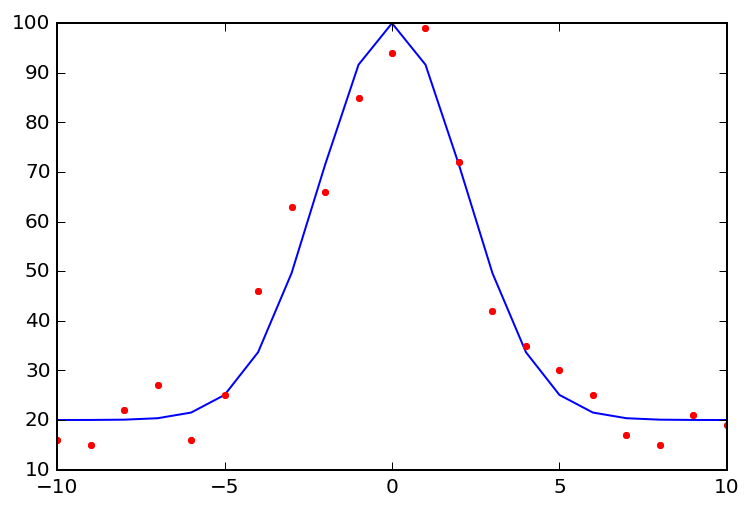

In [112]:
m = model(xplot,80,20)
y = poisson.rvs(m)
plt.plot(xplot,model(xplot,80,20),'b-')
plt.plot(xplot,y,'r.')

In [113]:
a_array = np.arange(10,120,0.1)
b_array = np.arange(10,120,0.1)
Agrid, Bgrid = np.meshgrid(a_array, b_array)

In [114]:
Z = log_likelihood(y,xplot,Agrid,Bgrid)
Z -= Z.max()
L = np.exp(Z)

<matplotlib.contour.QuadContourSet instance at 0x142b30320>

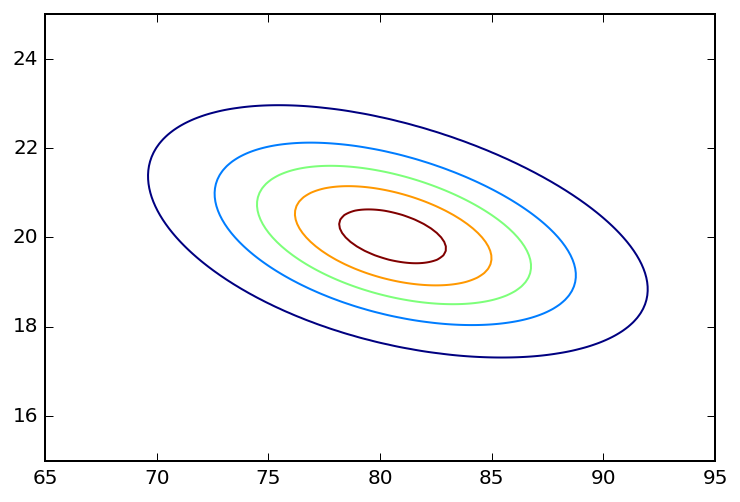

In [116]:
plt.xlim([65,95])
plt.ylim([15,25])
levels = np.array([0.1,0.3,0.5,0.7,0.9])
plt.contour(Agrid,Bgrid, L,levels)

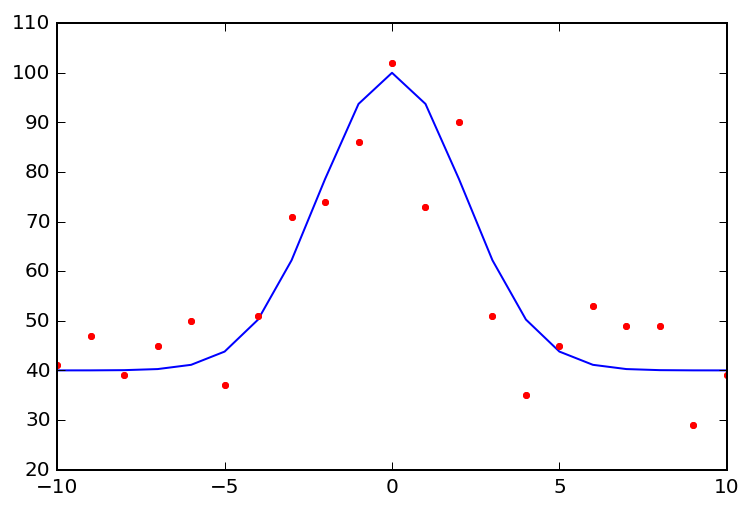

In [124]:
m = model(xplot,60,40)
y = poisson.rvs(m)
plt.plot(xplot,model(xplot,60,40),'b-')
plt.plot(xplot,y,'r.')

In [118]:
a_array = np.arange(10,120,0.1)
b_array = np.arange(10,120,0.1)
Agrid, Bgrid = np.meshgrid(a_array, b_array)

In [119]:
Z = log_likelihood(y,xplot,Agrid,Bgrid)
Z -= Z.max()
L = np.exp(Z)

<matplotlib.contour.QuadContourSet instance at 0x149a86488>

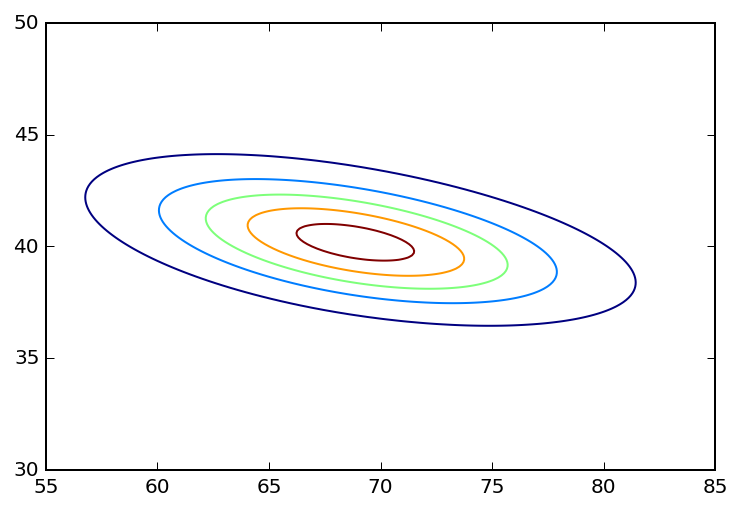

In [122]:
plt.xlim([55,85])
plt.ylim([30,50])
plt.contour(Agrid,Bgrid, L,levels)

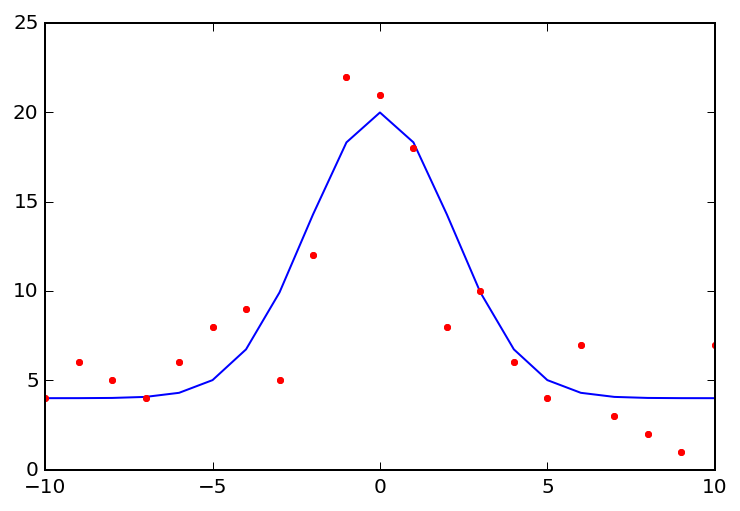

In [157]:
m = model(xplot,16,4)
y = poisson.rvs(m)
plt.plot(xplot,model(xplot,16,4),'b-')
plt.plot(xplot,y,'r.')

In [158]:
a_array = np.arange(1,30,0.1)
b_array = np.arange(1,30,0.1)
Agrid, Bgrid = np.meshgrid(a_array, b_array)

In [159]:
Z = log_likelihood(y,xplot,Agrid,Bgrid)
Z -= Z.max()
L = np.exp(Z)

<matplotlib.contour.QuadContourSet instance at 0x14c501e60>

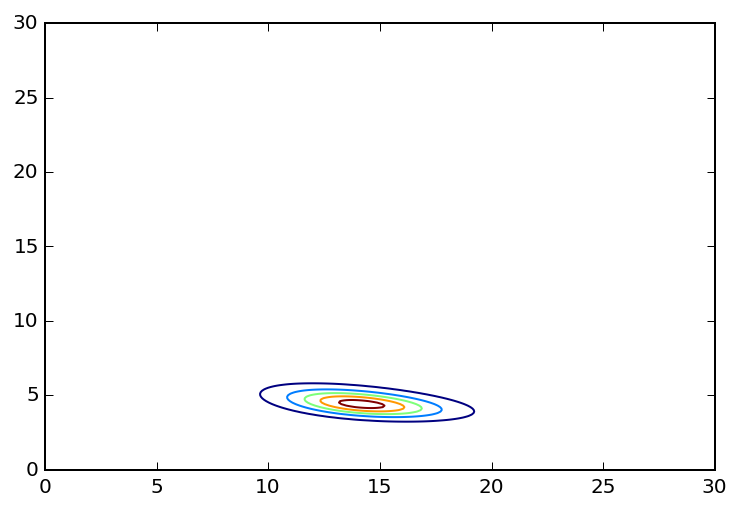

In [160]:
plt.xlim([0,30])
plt.ylim([0,30])
plt.contour(Agrid,Bgrid, L,levels)

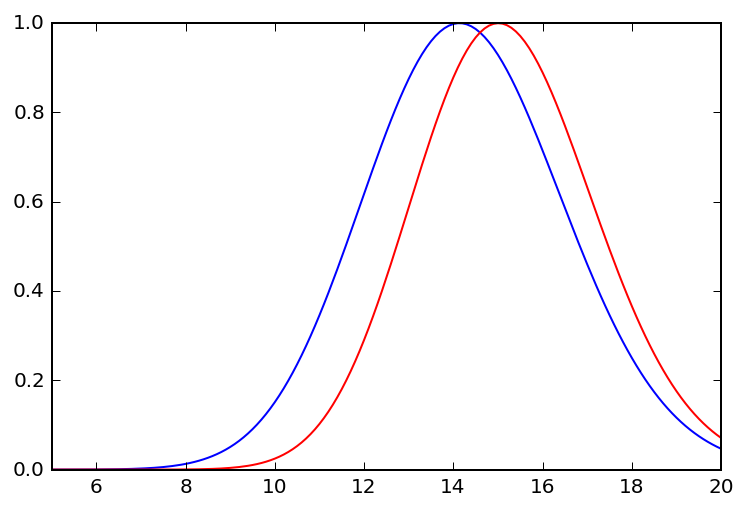

In [167]:
L_marginal_a = L.sum(axis=0)
L_marginal_a /= L_marginal_a.max()
L_conditional_b4 = L[29,:]
L_conditional_b4 /= L_conditional_b4.max()
plt.xlim([5,20])
plt.plot(a_array,L_marginal_a)
plt.plot(a_array,L_conditional_b4,'r-')